In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/wkddn/OneDrive/문서/GitHub/Kaggle/kaggle/Pima Indians/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [4]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [7]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [8]:
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<AxesSubplot:>

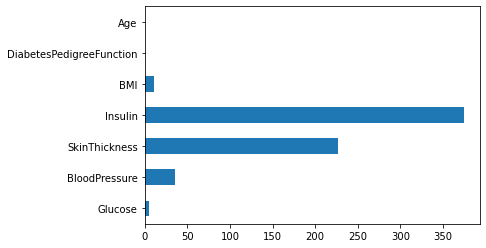

In [9]:
# 결측치 수치를 시각화
df_null.sum().plot.barh()

In [10]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

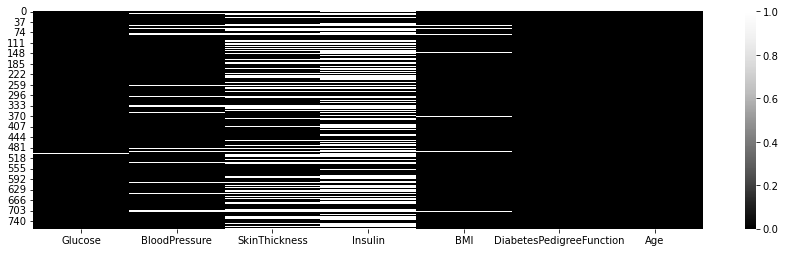

In [11]:
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

In [12]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
# 1 - 발병하는 케이스, 0 - 발병하지 않는 케이스
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [15]:
df.groupby(['Pregnancies'])['Outcome'].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [16]:
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

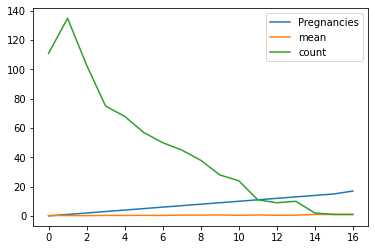

In [17]:
df_po.plot()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

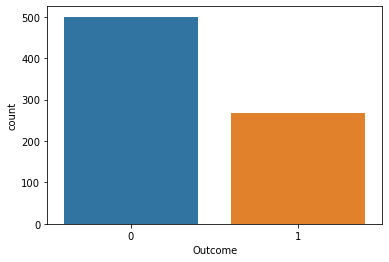

In [18]:
sns.countplot(data=df, x='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

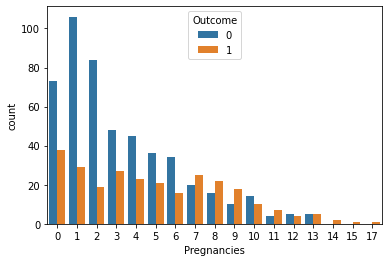

In [19]:
sns.countplot(data=df, x='Pregnancies', hue='Outcome')

In [20]:
# 6번 이상 임신하면 True, 미만은 False
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

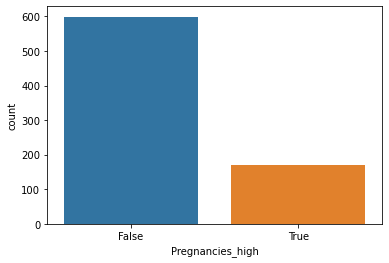

In [21]:
sns.countplot(data=df, x='Pregnancies_high')

<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

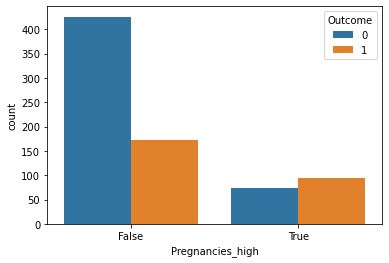

In [22]:
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

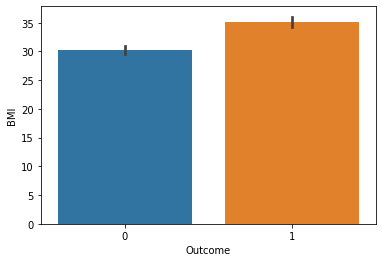

In [23]:
sns.barplot(data=df, x='Outcome', y='BMI')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

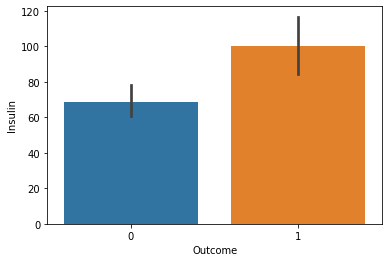

In [24]:
sns.barplot(data=df, x='Outcome', y='Insulin')

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

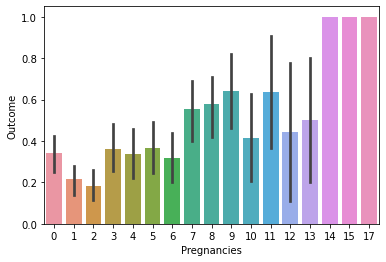

In [25]:
sns.barplot(data=df, x='Pregnancies', y='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

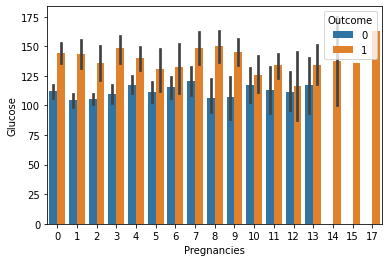

In [26]:
# 당뇨병 발병여부에 따라 글루코스 수치 차이가 있음을 알 수 있음
sns.barplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

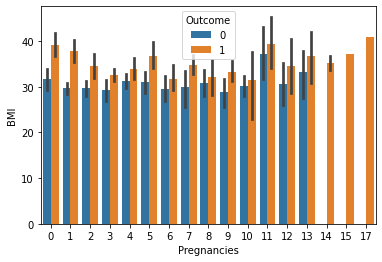

In [27]:
# 당뇨병 발병한 사람들이 BMI 수치가 더 높음
sns.barplot(data=df, x='Pregnancies', y='BMI', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

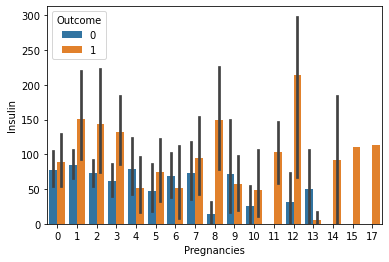

In [28]:
# 당뇨병 발병한 사람들이 인슐린 수치가 더 높음
# 평균 값이 y축으로 나타나고, 신뢰구간의 차이가 꽤 남
sns.barplot(data=df, x='Pregnancies', y='Insulin', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

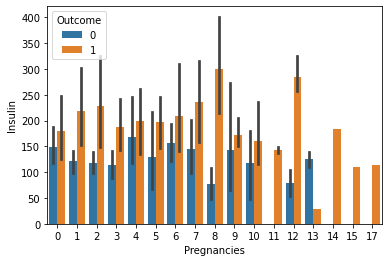

In [29]:
sns.barplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

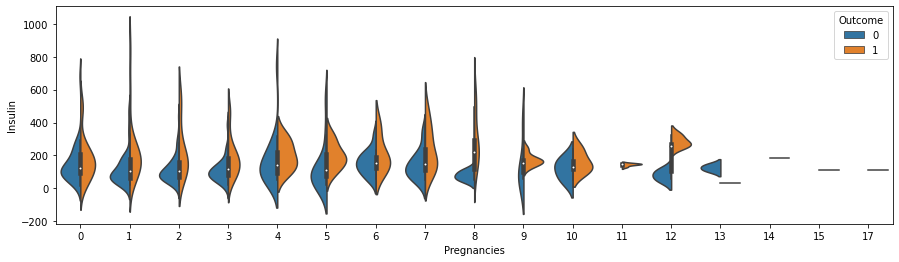

In [30]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

C:\Users\wkddn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wkddn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

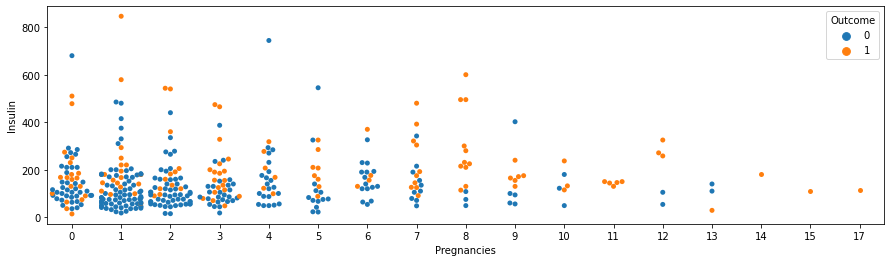

In [31]:
# 임신횟수는 당뇨병 발병률과 관련이 있는 것으로 보임
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

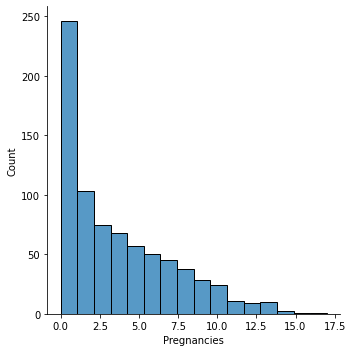

In [32]:
sns.displot(df['Pregnancies'])

In [33]:
df_0 = df[df['Outcome']==0]
df_1 = df[df['Outcome']==1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

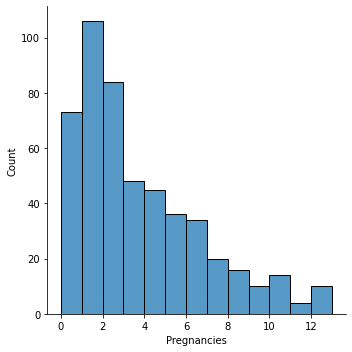

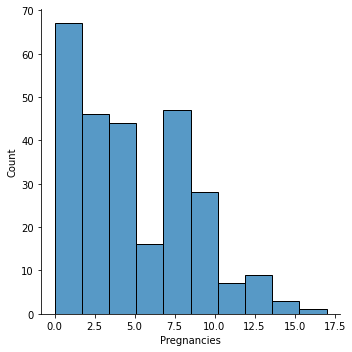

In [34]:
sns.displot(df_0['Pregnancies'])
sns.displot(df_1['Pregnancies'])

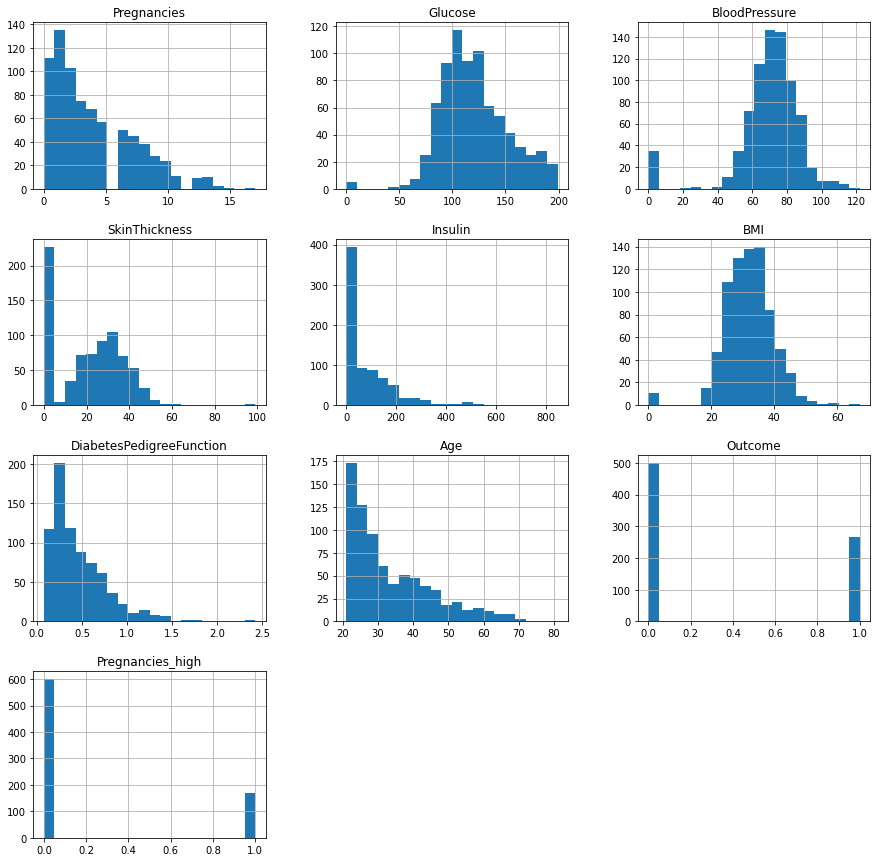

In [35]:
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
h = df.hist(figsize=(15, 15), bins=20)

In [36]:
col_num = df.columns.shape
col_num

(10,)

In [52]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [67]:
import warnings
warnings.filterwarnings(action='ignore')

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 0 2
3 SkinThickness 1 0
4 Insulin 1 1
5 BMI 1 2
6 DiabetesPedigreeFunction 2 0
7 Age 2 1
8 Outcome 2 2


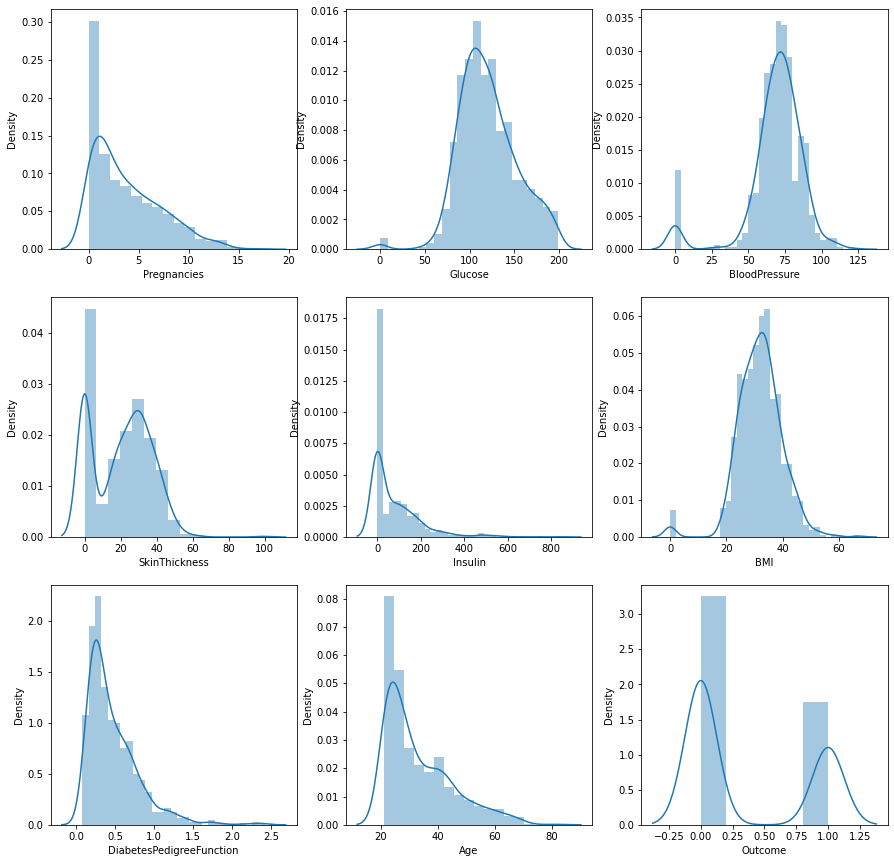

In [68]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    print(i, col_name, row, col)
    sns.distplot(df[col_name], ax=axes[row][col])

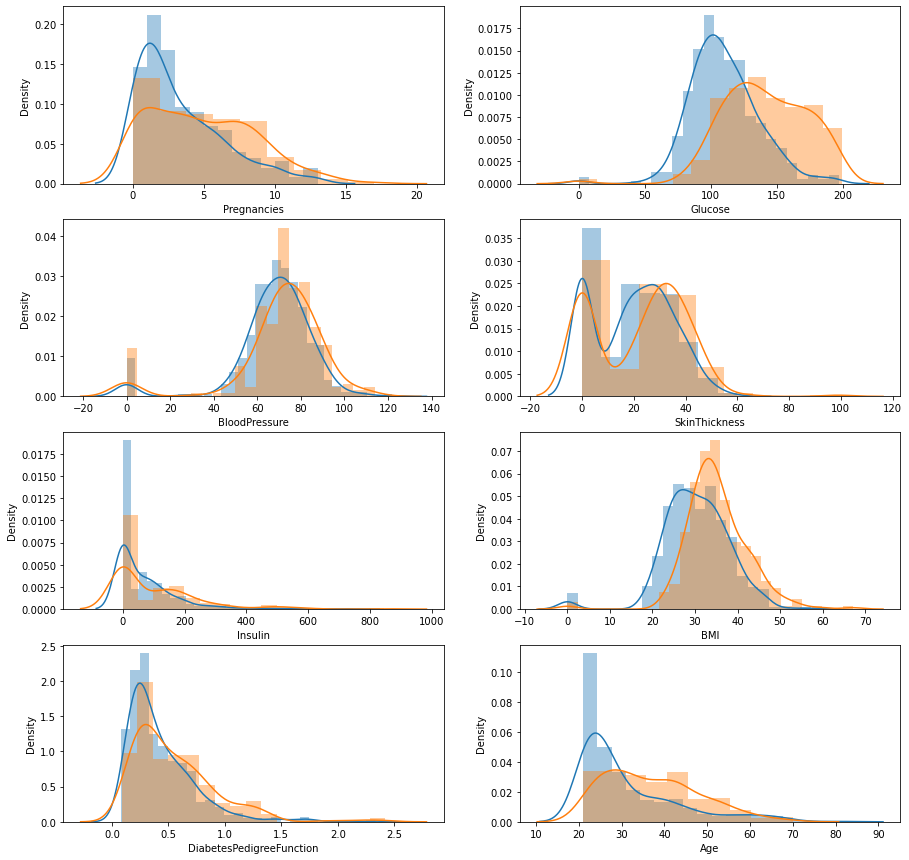

In [69]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

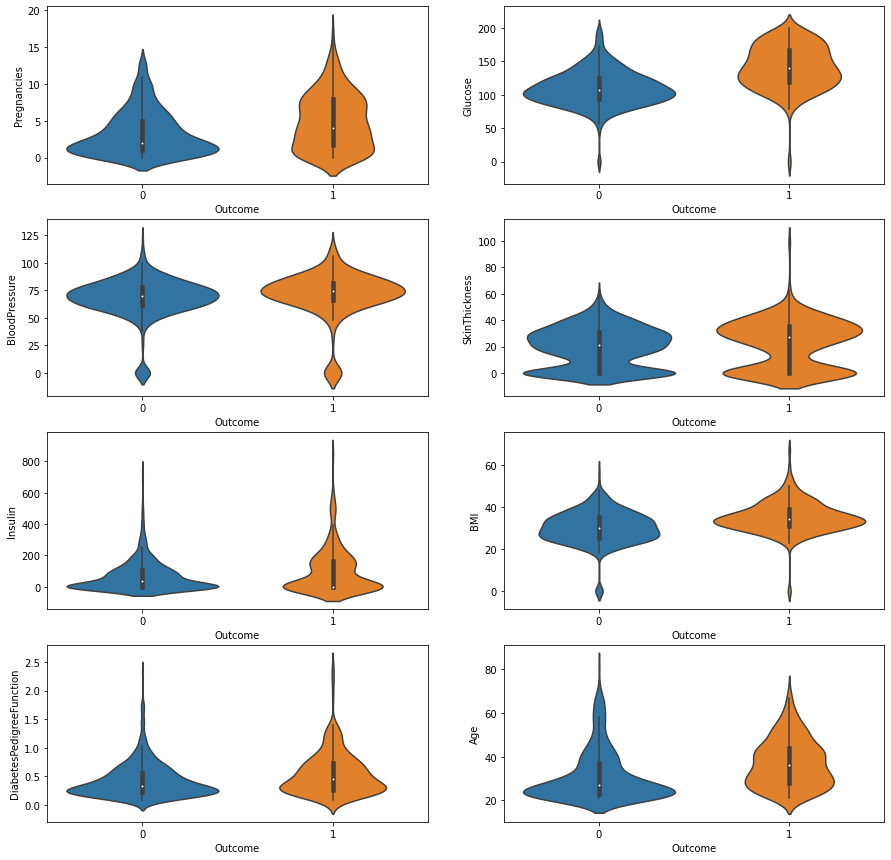

In [71]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])


<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

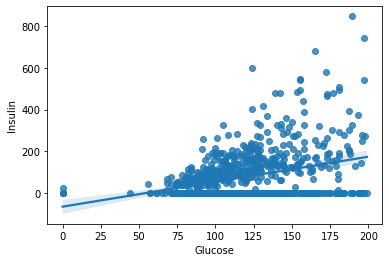

In [72]:
sns.regplot(data=df, x='Glucose', y='Insulin')

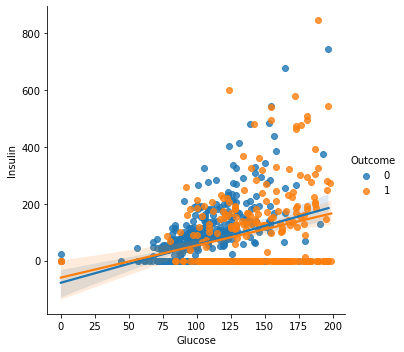

In [73]:
sns.lmplot(data=df, x='Glucose', y='Insulin', hue='Outcome')

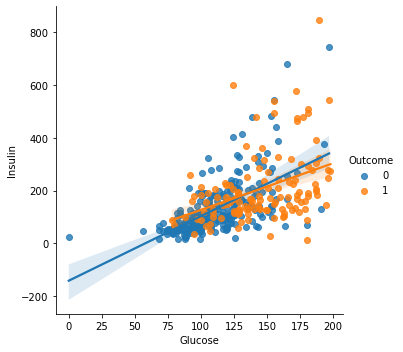

In [75]:
sns.lmplot(data=df[df['Insulin']>0], x='Glucose', y='Insulin', hue='Outcome')

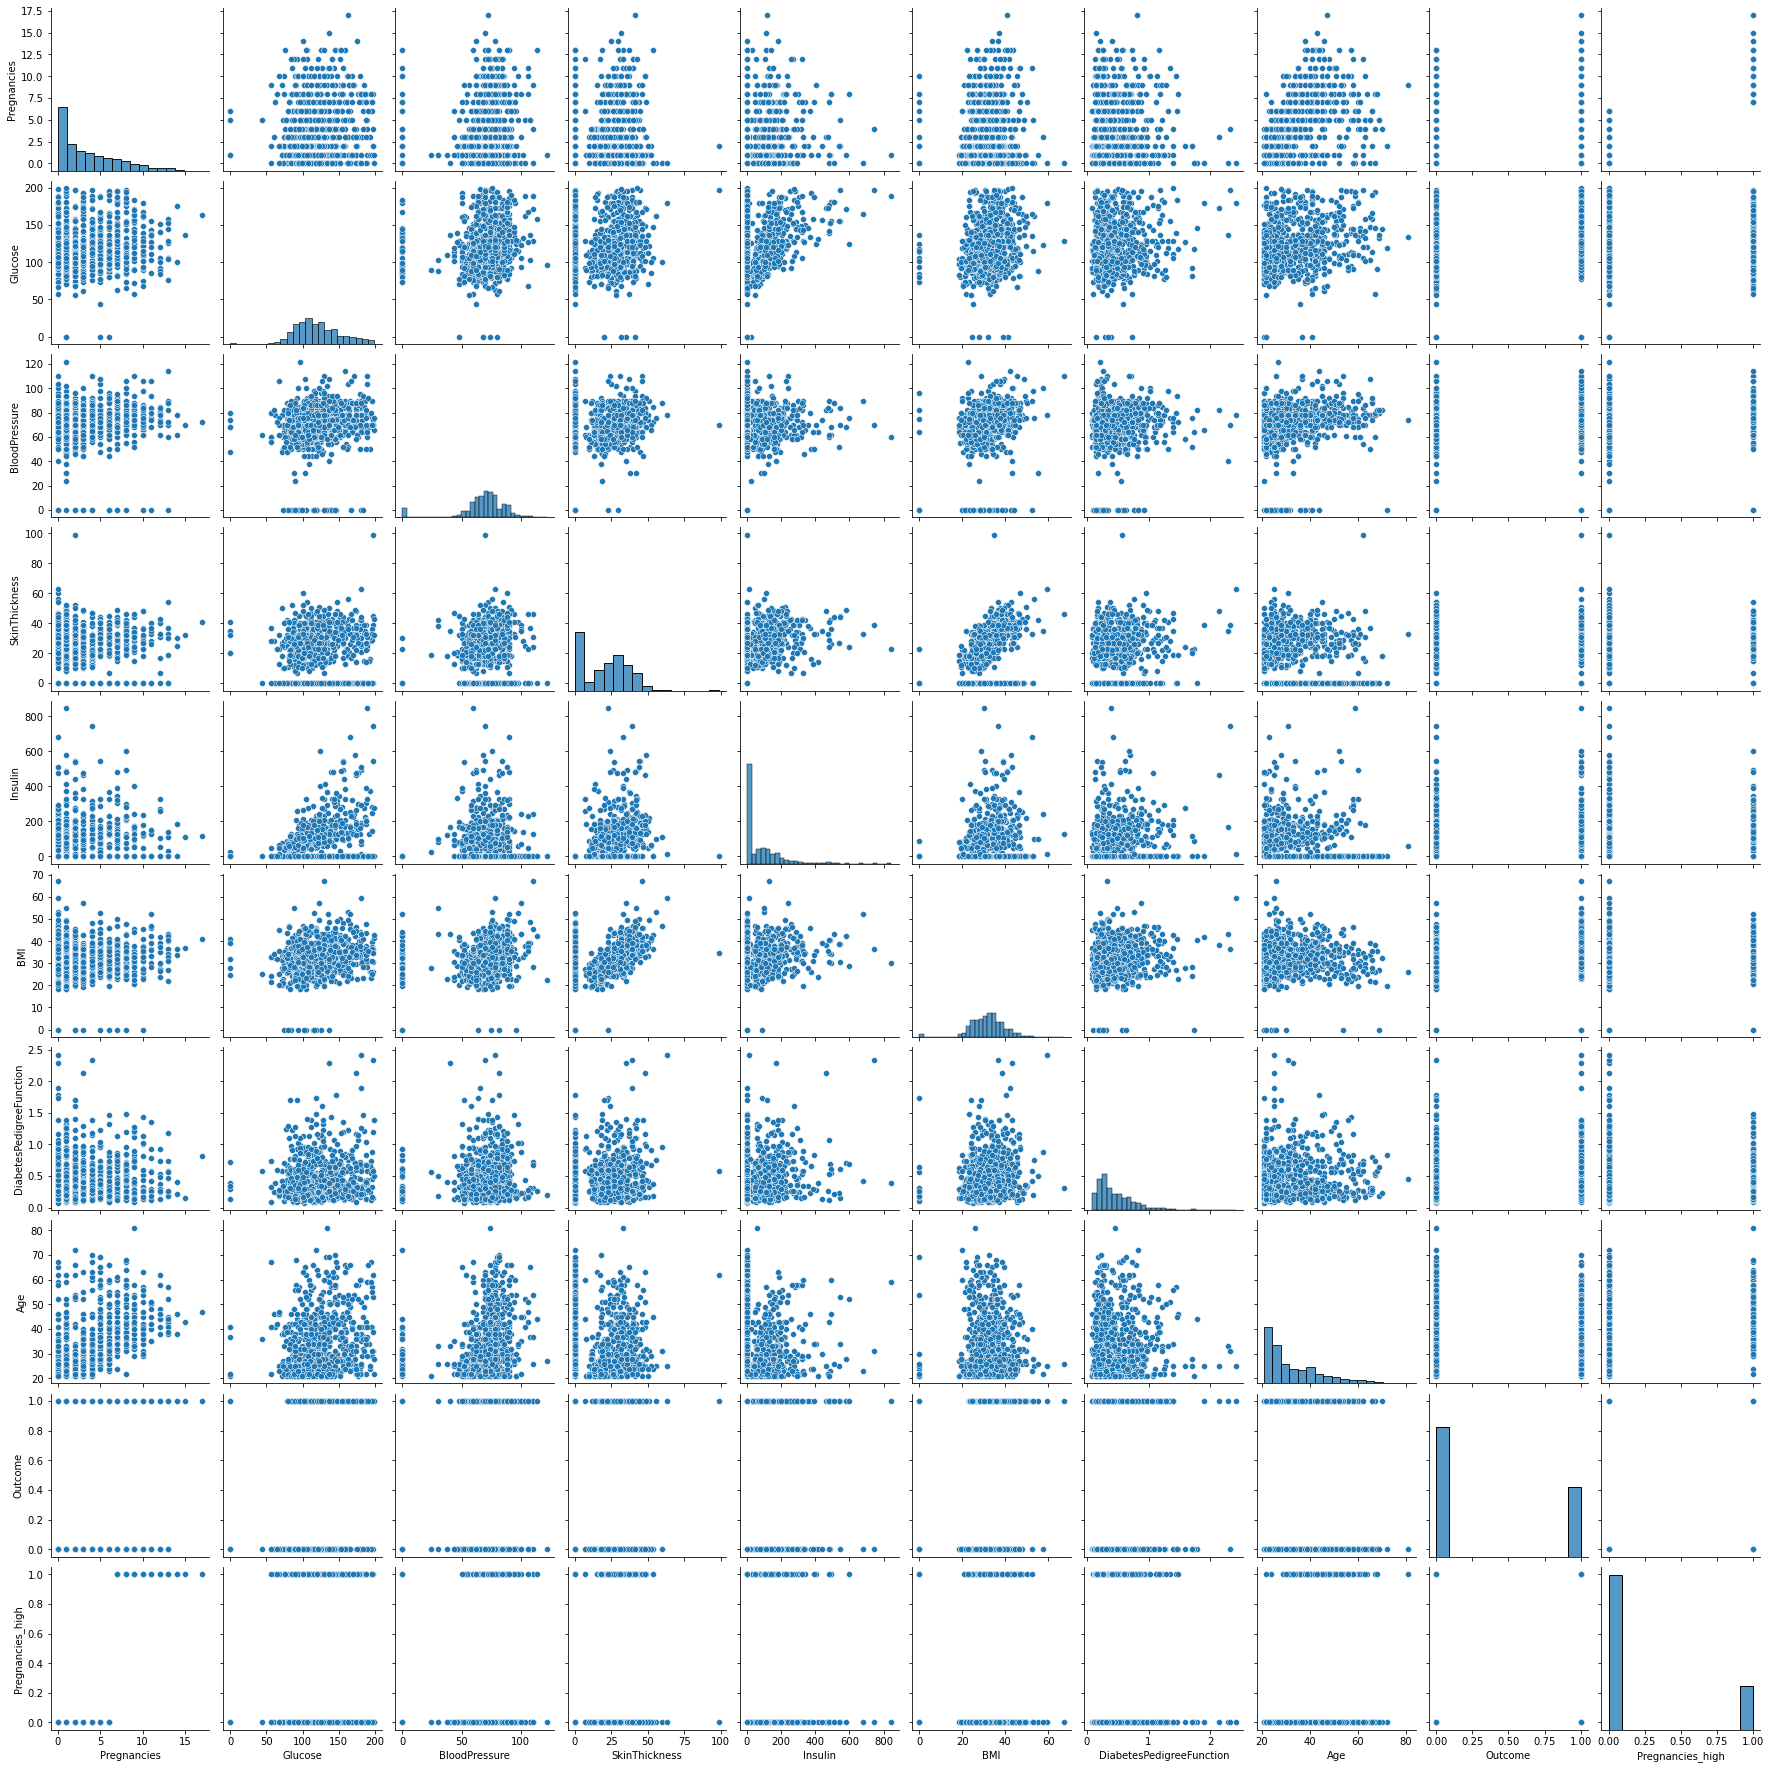

In [76]:
sns.pairplot(df)

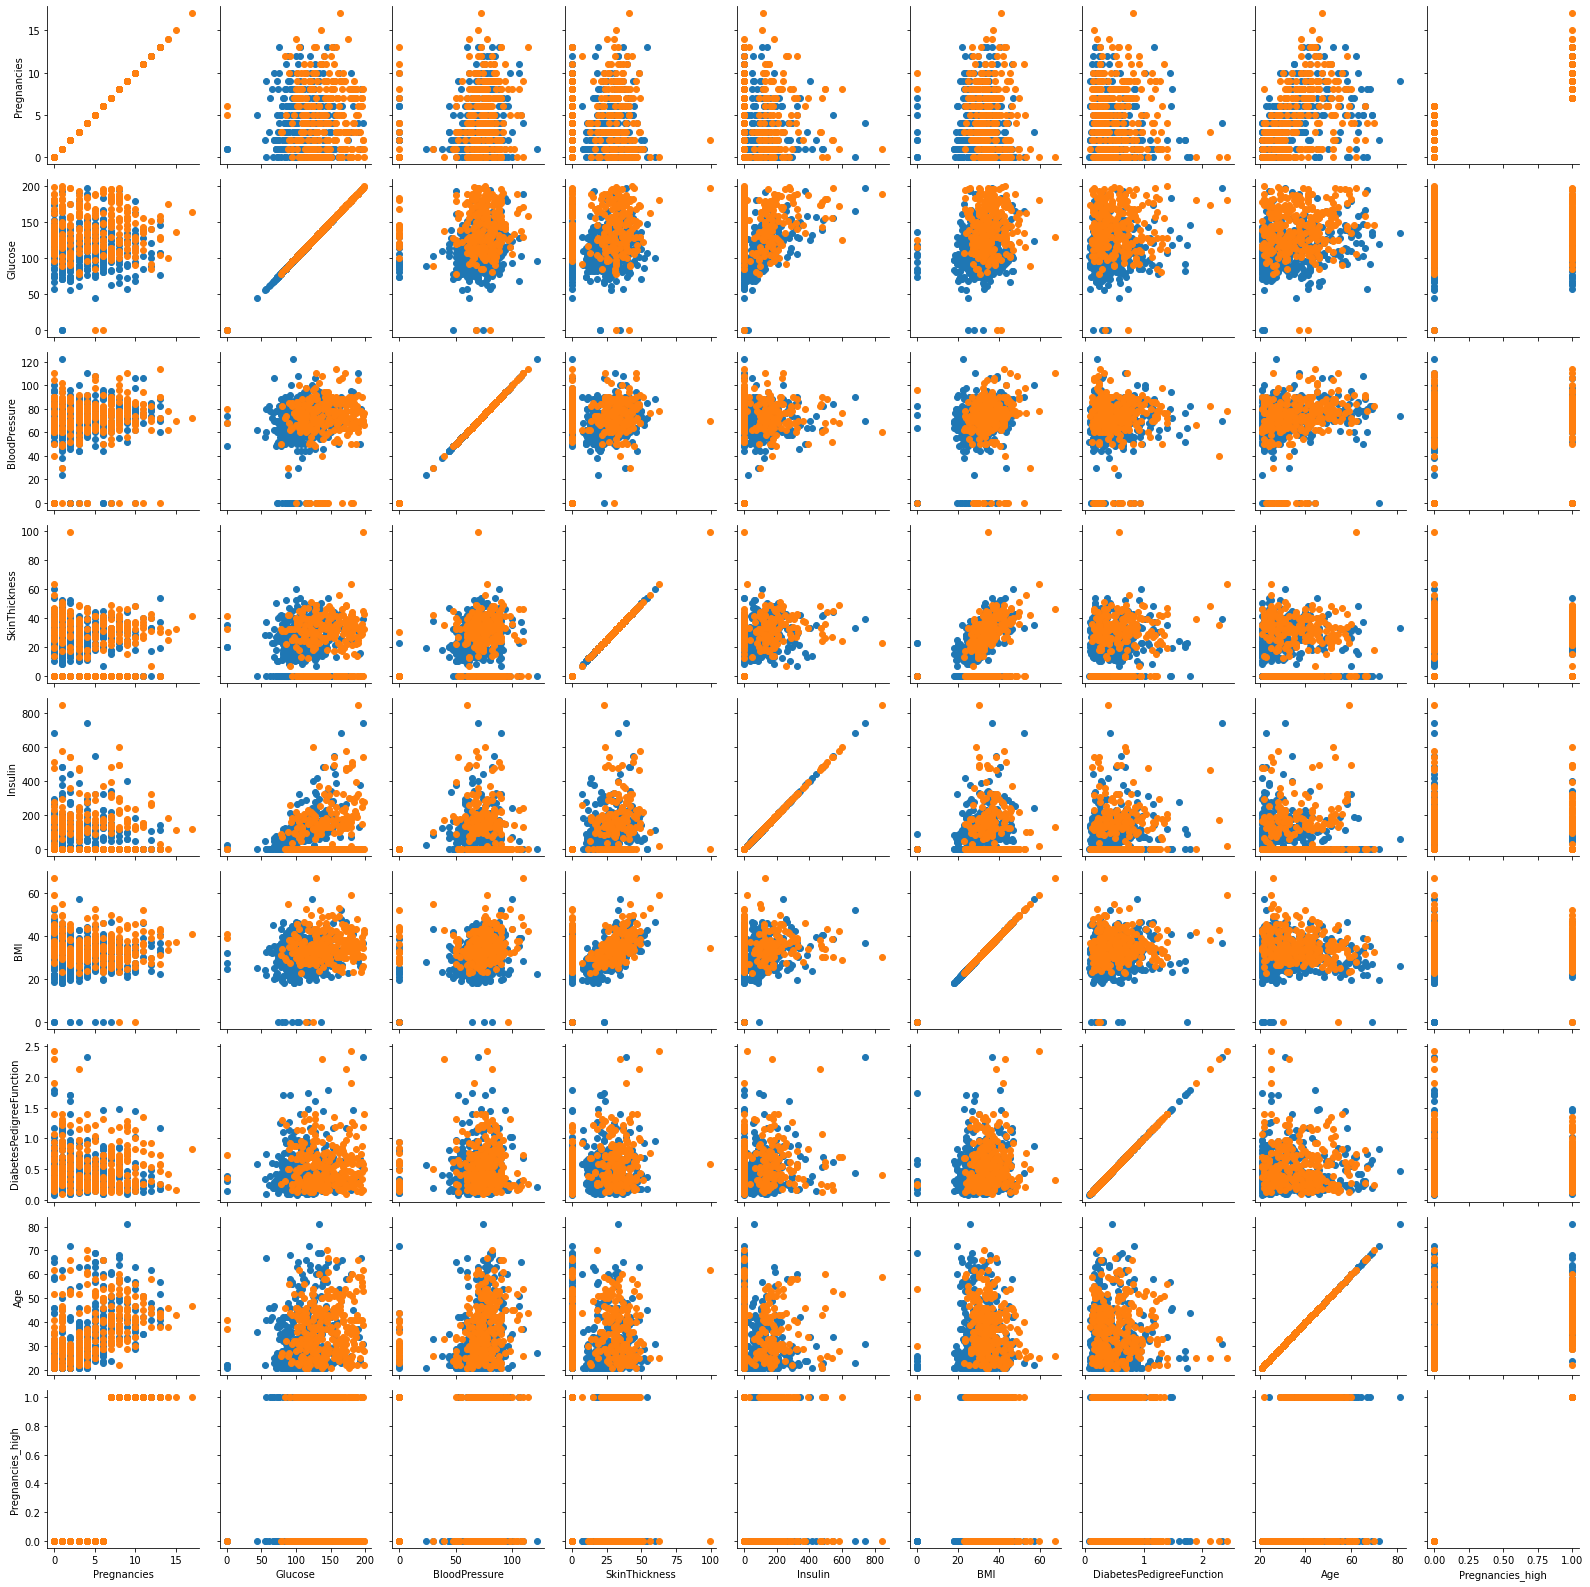

In [77]:
g = sns.PairGrid(df, hue='Outcome')
g.map(plt.scatter)

In [79]:
df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


<AxesSubplot:>

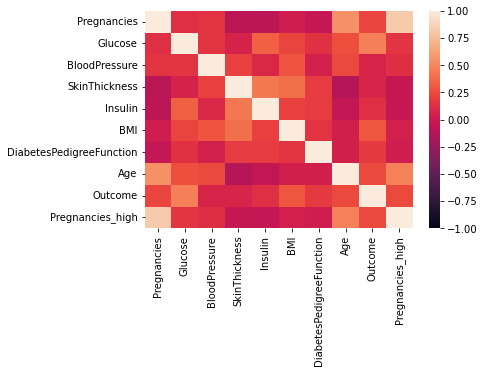

In [81]:
sns.heatmap(df_corr, vmax=1, vmin=-1)

<AxesSubplot:>

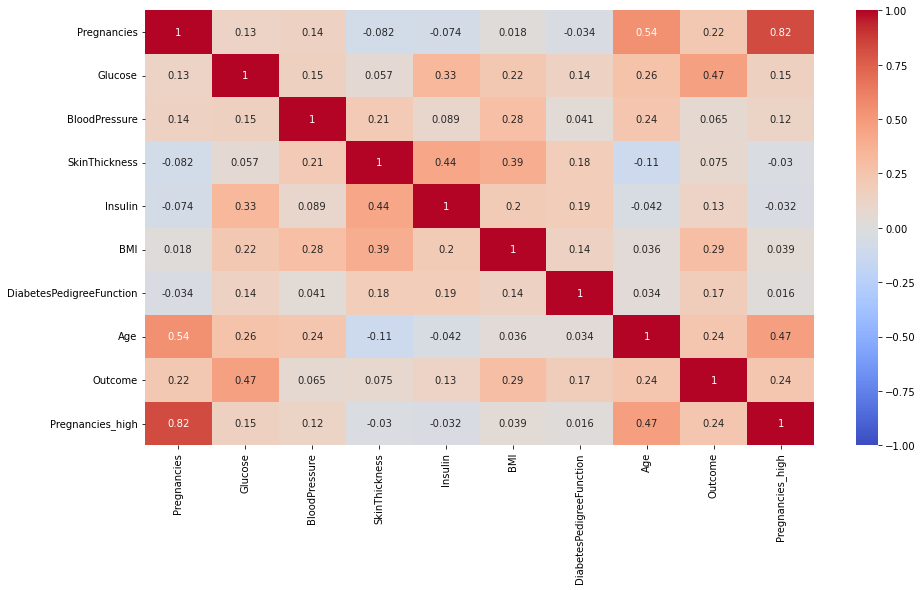

In [86]:
# 글루코스와 Outcome 값이 상관관계가 높은 것으로 나타나고
# 인슐린과 Outcome은 상관관계가 높지 않은 것으로 보임
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')

In [89]:
dF_matrix = df.iloc[:,:-2].replace(0,np.nan)
dF_matrix['Outcome'] = df['Outcome']
dF_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [91]:
df_corr['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Pregnancies_high            0.237557
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

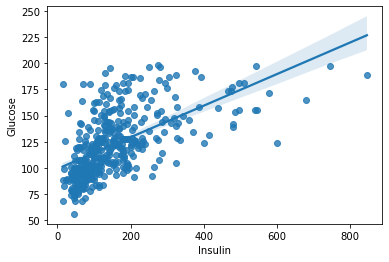

In [92]:
# 회귀선이 1이 가까울수록 상관계수가 높다고 볼 수 있음
# Insulin의 이상치를 정리해도 더욱 상관관계가 높아질 것
sns.regplot(data=dF_matrix, x='Insulin', y='Glucose')

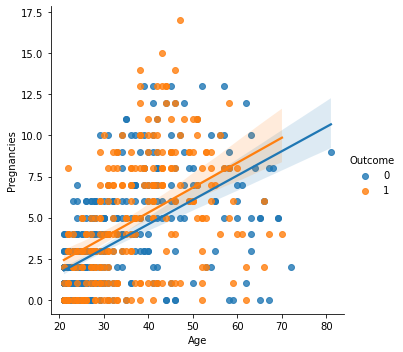

In [96]:
# 연령이 증가함에 따라 임신 횟수도 증가함
sns.lmplot(data=df, x='Age', y='Pregnancies', hue='Outcome')

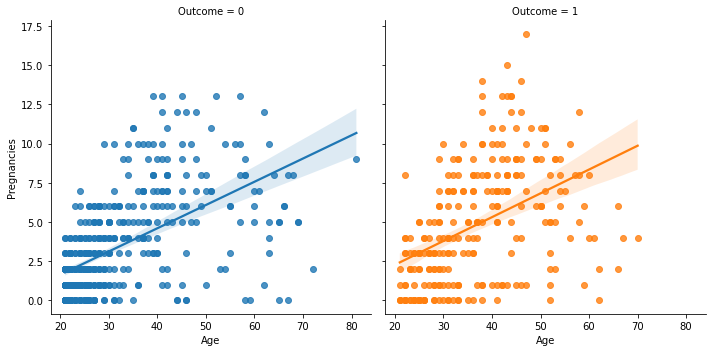

In [97]:
sns.lmplot(data=df, x='Age', y='Pregnancies', hue='Outcome', col='Outcome')